In [1]:
# وارد کردن کتابخانه های ضروری
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [2]:
# اتصال به گوگل درایو جهت خواندن اطلاعات
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# img خواندن تصویر و انتساب آن به متغیر
img = cv2.imread('/content/drive/MyDrive/HW5_01.JPEG')
assert img is not None, 'file could not be read, check with os.path.exists()'

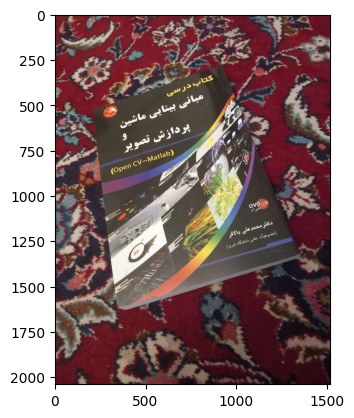

In [4]:
# نمایش تصویر اخذ شده از دوربین
plt.imshow(img[..., ::-1])

In [5]:
h, w , _ = img.shape

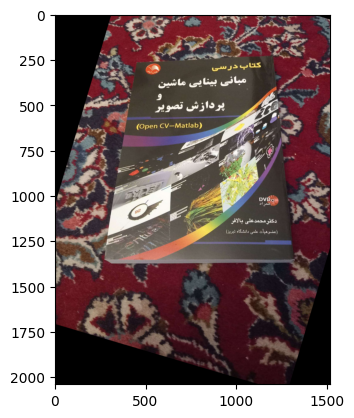

In [6]:
# چرخاندن تصویر در حدی که لبه پایینی کتاب موازی افق شود
angle_of_rotation = 16.5
theta = angle_of_rotation * np.pi /180.0
rot_img = img.copy()
T = np.float32([[np.cos(theta), -np.sin(theta), 400], [np.sin(theta), np.cos(theta), -300]])
rot_img = cv2.warpAffine(img, T, (w, h))
plt.imshow(rot_img[...,::-1])

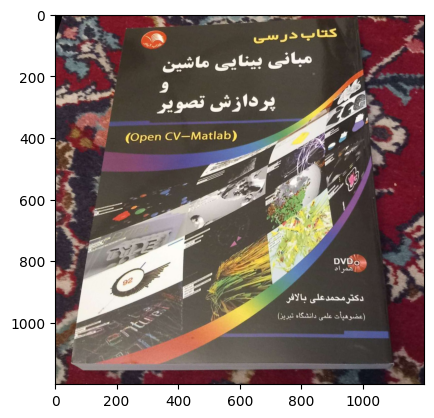

In [7]:
# برش دادن قسمتی از تصویر
y = 220
x = 220
h = 1200
w = 1200
crop_img = rot_img[y: y + h, x: x + w]
plt.imshow(crop_img[..., ::-1])

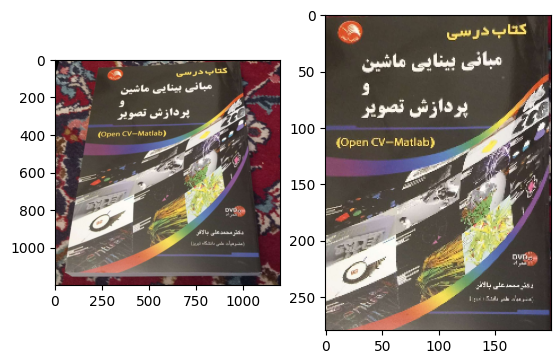

In [8]:
# مشخص کردن مختصات 4 نقطه در تصویر اصلی و مختصات نگاشت هر یک از این نقاط در تصویر جدید
pst1 = np.float32([[245, 40], [995, 20], [75, 1125], [1100, 1125]])
pst2 = np.float32([[0, 0], [200, 0], [0, 280], [200, 280]])

# محاسبه ماتریس مورد نیاز جهت رفع مشکل پرسپکتیو
M = cv2.getPerspectiveTransform(pst1, pst2)

# رفع پرسپکتیو با استفاده از ماتریس تبدیل
dst = cv2.warpPerspective(crop_img, M, (200, 280))

# ترسیم تصویر اصلی و تصویر تبدیل یافته
plt.subplot(121), plt.imshow(crop_img[..., ::-1])
plt.subplot(122), plt.imshow(dst[..., ::-1])
plt.show()

In [9]:
# img خواندن تصویر و انتساب آن به متغیر
globals()['img0'] = cv2.imread('/content/drive/MyDrive/HW5_02.png')
assert img0 is not None, 'file could not be read, check with os.path.exists()'

True

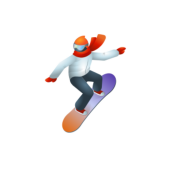

In [10]:
# به دست آوردن طول و عرض تصویر؛ نمایش تصویر و ذخیره آن با نام مناسب
h, w , _ = img0.shape
plt.rcParams["figure.figsize"] = (2, 2)
plt.axis('off')
plt.imshow(img0[..., ::-1])
cv2.imwrite('/content/drive/MyDrive/img0.png', img0)

In [11]:
def makeframe(cf, deg, dc, dr, w, h):
  theta = deg * np.pi /180.0
  T = np.float32([[np.cos(theta), -np.sin(theta), dc], [np.sin(theta), np.cos(theta), dr]])
  globals()['img' + str(cf + 1)] = cv2.warpAffine(globals()['img' + str(cf)] , T, (w, h), borderValue=(255, 255, 255))
  plt.rcParams["figure.figsize"] = (2, 2)
  plt.axis('off')
  plt.imshow(globals()['img' + str(cf + 1)][...,::-1])
  cv2.imwrite('/content/drive/MyDrive/' + 'img' + str(cf + 1) + '.png', globals()['img' + str(cf + 1)])

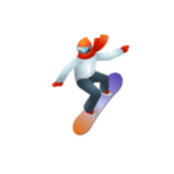

In [12]:
makeframe(0, 5, 0, 0, w, h)
makeframe(1, 5, 0, 0, w, h)
makeframe(2, -5, 0, 0, w, h)
makeframe(3, -5, 0, 0, w, h)
makeframe(4, 0, 0, -8, w, h)
makeframe(5, 0, 0, -8, w, h)
makeframe(6, 0, 0, -8, w, h)
makeframe(7, 0, 0, 10, w, h)
makeframe(8, 0, 0, 10, w, h)
makeframe(9, 0, 0, 10, w, h)
makeframe(10, 0, 0, 10, w, h)
makeframe(11, -5, 0, 0, w, h)
makeframe(12, -5, 0, 0, w, h)
makeframe(13, -5, 0, 0, w, h)
makeframe(14, 10, 0, 0, w, h)

In [13]:
import glob

# خواندن تمام فایل هایی که مطابق الگوی نام داده شده هستند
files = glob.glob(r'/content/drive/MyDrive/img*.png')

In [14]:
from PIL import Image
image_array = []
for my_file in files:
  image = Image.open(my_file)
  image_array.append(image)
print('image_arrays shape:', np.array(image_array).shape)

image_arrays shape: (16,)


<ipython-input-14-2be4815937ca>:6: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print('image_arrays shape:', np.array(image_array).shape)
<ipython-input-14-2be4815937ca>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print('image_arrays shape:', np.array(image_array).shape)


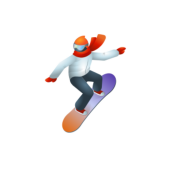

In [15]:
import matplotlib.pyplot as plt
# ایجاد زيرتصوير
fig, ax = plt.subplots()

# تنظیم تصویر اولیه
plt.axis('off')
im = ax.imshow(image_array[0], animated=True)

In [16]:
def update(i):
  im.set_array(image_array[i])
  return im,

In [17]:
# ایجاد انیمیشن
animation_fig = animation.FuncAnimation(fig, update, frames = len(image_array), interval = 200, blit = True, repeat_delay = 10,)

# نمایش انیمیشن
plt.show()

# gif ذخیره انیمیشن به صورت فایل
animation_fig.save('/content/drive/MyDrive/animated_GMM.gif')